In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import math

In [76]:
# Get data
df = pd.read_csv("Data Processing.csv",sep=';')

# Drop row if A OR B is NAN
df = df.drop(df[df.A.isna()].index)
df = df.drop(df[df.B.isna()].index)

# Clean non numeric charaters
for c in df:
    if df[c].dtypes != 'float64':
        df[c] = pd.to_numeric(df[c].astype(str).str.replace('[^.0-9]+', ''))

# Drop if column A + B >= 9.5
df = df.drop(df[df.A + df.B >= 9.5].index)

51326


In [77]:
print("There are %s rows that satisfies the 3 conditions." % (len(df)))

There are 40800 rows that satisfies the 3 conditions.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) ins

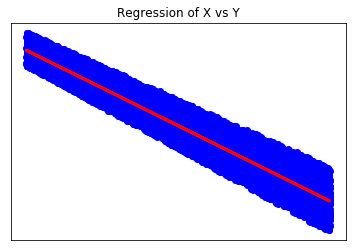

Pearson R score: 0.97


In [80]:
# Make regression
model = linear_model.LinearRegression()
model.fit(df.X.reshape(-1, 1), df.Y.reshape(-1, 1))
model_preds = model.predict(df.X.reshape(-1, 1))

plt.scatter(df.X.reshape(-1, 1), df.Y.reshape(-1, 1),  color='blue')
plt.plot(df.X.reshape(-1, 1), model_preds, color='red', linewidth=3)
plt.title("Regression of X vs Y")
plt.xticks(())
plt.yticks(())

plt.show()

print('Pearson R score: %.2f' % math.sqrt(r2_score(df.Y, model_preds)))
print('Variance score: %.2f' % math.sqrt(r2_score(df.Y, model_preds)))